In [1]:
using StatsBase, Gadfly, Distributions

In [2]:
function samplestrap(data, n; coverage = .95)
    q = length(data)
    res = zeros(Float64, n)
    for j = 1:n
        res[j] = mean(sample(data, n, replace = true))
    end
    α = (1 - coverage) / 2
    floor(α * n)
    sort!(res)
    (res, [res[floor(α * n)], res[ceil((1 - α) * n)]], minimum(res), maximum(res), mean(res))
end

samplestrap (generic function with 1 method)

In [3]:
data = rand(Exponential(), 10)

10-element Array{Float64,1}:
 0.176046 
 0.954617 
 1.02914  
 1.01634  
 1.49921  
 0.0248535
 2.25025  
 1.70023  
 0.705253 
 2.31043  

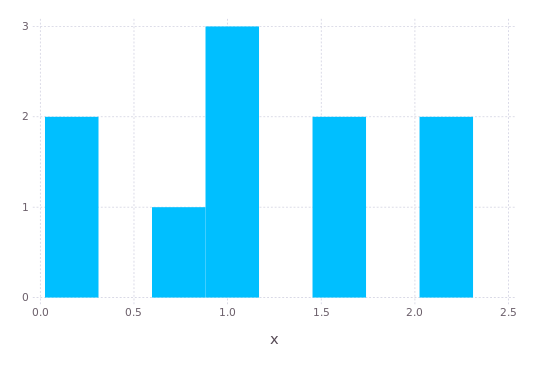

In [4]:
plot(x = data, Geom.histogram) 

In [5]:
(samples, interval, min, max, mean) = samplestrap(data, 1000, coverage = .5);

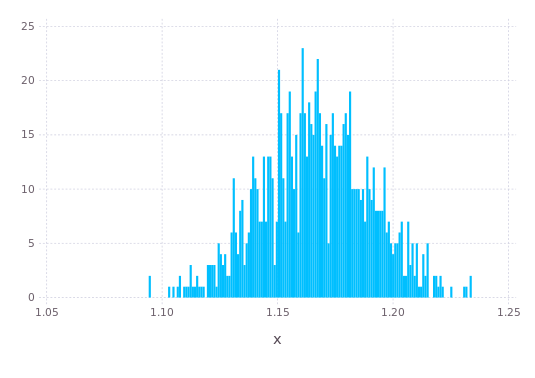

In [6]:
plot(x = samples, Geom.histogram)

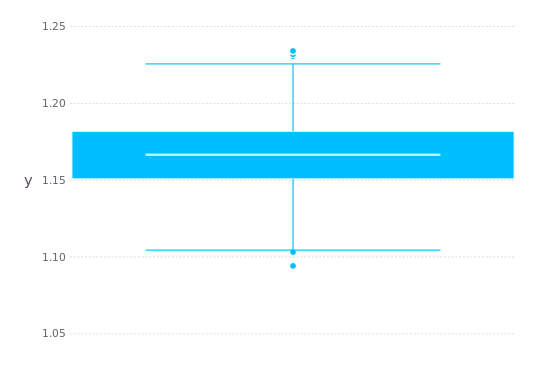

In [7]:
plot(y = samples, Geom.boxplot)

In [8]:
interval

2-element Array{Float64,1}:
 1.15077
 1.18186

In [9]:
min

1.0941859050457057

In [10]:
max

1.2340770255581308

In [11]:
mean

1.1664695856279577